In [17]:
#Importation Dataset CIFAR-10
import tensorflow as tf

(x_train_t, y_train_t), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [18]:
#Librairie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix



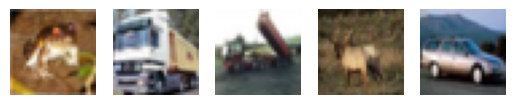

In [19]:
#Split le data set en train et en validation (pour les CNN)

N_train_t = np.shape(x_train_t)[0]
N_train = round(0.8*N_train_t) # 80% pour le train et 20% pour la validation
x_train,y_train = x_train_t[0:N_train],y_train_t[0:N_train]
x_val,y_val = x_train_t[N_train:],y_train_t[N_train:]

#Normalisation des images

x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

plt.figure
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
#Algo de ML : Decision Tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

x_train_flat = x_train_t.reshape((x_train_t.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

arbre = DecisionTreeClassifier(max_depth=10, random_state=42)
arbre.fit(x_train_scaled, y_train_t.ravel())

param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

# GridSearch avec validation croisée 3-fold
grid_search = GridSearchCV(arbre, param_grid, cv=3)
grid_search.fit(x_train_scaled, y_train_t.ravel())

y_pred = arbre.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # Calcul du rappel
print(f"Précision de l'arbre de décision sur CIFAR-10 : {acc:.2f}")
print(f"Rappel de l'arbre de décision sur CIFAR-10 : {recall:.2f}")

In [ ]:
#Foret Aleatoire 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf.fit(x_train_scaled, y_train_t.ravel())

# Prédiction et évaluation
y_pred = rf.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # Calcul du rappel
print(f"Précision de la forêt aléatoire sur CIFAR-10 : {acc:.2f}")
print(f"Rappel de la forêt aléatoire sur CIFAR-10 : {recall:.2f}")

In [20]:
#3 CNN aux architectures différentes

# Redimensionner les images (28x28 -> 28x28x1) pour la convolution
x_train = x_train.reshape(-1, 32, 32, 3)
x_val = x_val.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
# Encodage One-Hot des labels
y_train_c = to_categorical(y_train, 10)
y_val_c = to_categorical(y_val, 10)
y_test_c = to_categorical(y_test, 10)

In [12]:
#CNN classique (comme dans le TD)
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), # Couche Conv
MaxPooling2D(2,2), # Max Pooling
Conv2D(64, (3,3), activation='relu'), # Deuxième Couche Conv
MaxPooling2D(2,2),
Flatten(), # Aplatit les données
Dense(128, activation='relu'), # Couche Fully Connected
Dense(10, activation='softmax') # Couche de sortie (10 classes)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#CNN un peu plus complexe (une couche de convolution en + et ajout de dropout)

model_2 = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), 
MaxPooling2D(2,2), 
Dropout(0.25),
Conv2D(64, (3,3), activation='relu'), 
MaxPooling2D(2,2),
Dropout(0.25),
Conv2D(128, (3,3), activation='relu'),
Flatten(),
Dense(256, activation='relu'), 
Dense(10, activation='softmax') 
])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

In [ ]:
#Modèle basé sur le CDNN https://arxiv.org/pdf/1202.2745v1 


model_3 = Sequential([
    Conv2D(300, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  
    Conv2D(300, (2, 2), activation='relu'),  
    MaxPooling2D((2, 2)),
    Dropout(0.25)
    Conv2D(300, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(300, (2, 2), activation='relu'), 
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(), 
    Dense(300, activation='relu'),  
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  
])


model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.3616 - loss: 1.7527 - val_accuracy: 0.5399 - val_loss: 1.2887
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.5771 - loss: 1.1979 - val_accuracy: 0.6019 - val_loss: 1.1340
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6377 - loss: 1.0358 - val_accuracy: 0.6229 - val_loss: 1.0796
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6786 - loss: 0.9237 - val_accuracy: 0.6643 - val_loss: 0.9870
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7094 - loss: 0.8390 - val_accuracy: 0.6658 - val_loss: 0.9665
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7331 - loss: 0.7738 - val_accuracy: 0.6901 - val_loss: 0.9089
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7533 - loss: 0.7076 - val_accuracy: 0.6925 - val_loss: 0.9069
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7760 - loss: 0.6410 - 

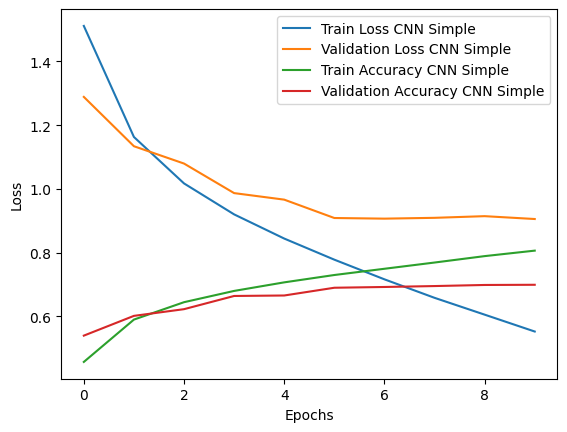

In [13]:
# Entraînement du 1er model
history_1 = model.fit(
    x_train, y_train_c,
    validation_data=(x_val, y_val_c),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)

plt.plot(history_1.history['loss'], label='Train Loss CNN Simple')
plt.plot(history_1.history['val_loss'], label='Validation Loss CNN Simple')
plt.plot(history_1.history['accuracy'], label='Train Accuracy CNN Simple')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy CNN Simple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
# Entraînement model_2
history_intermediate = model_2.fit(
    x_train, y_train_c,
    validation_data=(x_val, y_val_c),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)
plt.plot(history_intermediate.history['loss'], label='Train Loss CNN Inter')
plt.plot(history_intermediate.history['val_loss'], label='Validation Loss CNN Inter')
plt.plot(history_intermediate.history['accuracy'], label='Train Accuracy CNN Inter')
plt.plot(history_intermediate.history['val_accuracy'], label='Validation Accuracy CNN Inter')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:

# Entraînement du CDNN
history_deep = model_3.fit(
    x_train, y_train_c,
    validation_data=(x_val, y_val_c),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)
plt.plot(history_deep.history['loss'], label='Train Loss CDNN')
plt.plot(history_deep.history['val_loss'], label='Validation Loss CDNN')
plt.plot(history_deep.history['accuracy'], label='Train Accuracy CDNN')
plt.plot(history_deep.history['val_accuracy'], label='Validation Accuracy CDNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
#Eval des tests

# Évaluation du modèle simple
test_loss_1, test_acc_1 = model.evaluate(x_test, y_test_c, verbose=0)
print("=== Modèle simple ===")
print(f"Test accuracy : {test_acc_1:.2f}")
print(f"Test loss : {test_loss_1:.2f}")
y_pred_1 = model.predict(x_test)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_true_1 = np.argmax(y_test_c, axis=1)
print("Classification report :")
print(classification_report(y_true_1, y_pred_classes_1))
print("Confusion matrix :")
print(confusion_matrix(y_true_1, y_pred_classes_1))

# Évaluation du modèle intermédiaire
test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test_c, verbose=0)
print("\n=== Modèle intermédiaire ===")
print(f"Test accuracy : {test_acc_2:.2f}")
print(f"Test loss : {test_loss_2:.2f}")
y_pred_2 = model_2.predict(x_test)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)
print("Classification report :")
print(classification_report(y_true_1, y_pred_classes_2))
print("Confusion matrix :")
print(confusion_matrix(y_true_1, y_pred_classes_2))

# Évaluation du modèle CDNN
test_loss_3, test_acc_3 = model_3.evaluate(x_test, y_test_c, verbose=0)
print("\n=== Modèle CDNN ===")
print(f"Test accuracy : {test_acc_3:.2f}")
print(f"Test loss : {test_loss_3:.2f}")
y_pred_3 = model_3.predict(x_test)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)
print("Classification report :")
print(classification_report(y_true_1, y_pred_classes_3))
print("Confusion matrix :")
print(confusion_matrix(y_true_1, y_pred_classes_3))

In [21]:
#cnn hybride avec VGG16 + SVM
from sklearn.svm import SVC
from tensorflow.keras.applications import VGG16
from tensorflow.image import resize
#Resize en 64x64 pcq VGG16 ne prend pas en charge les images de 32x32
x_train_vgg = resize(x_train, (64, 64))
x_test_vgg = resize(x_test, [64, 64])

#VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers:
    layer.trainable = False

# Extraction des features avec VGG16 (verbose=1 pour afficher la progression)
x_train_vgg_extraite = base_model.predict(x_train_vgg, verbose=1)
x_test_vgg_extraite= base_model.predict(x_test_vgg, verbose=1)

# aplatir pour le SVM
features_train_flat = x_train_vgg_extraite.reshape(x_train_vgg_extraite.shape[0], -1)
features_test_flat = x_test_vgg_extraite.reshape(x_test_vgg_extraite.shape[0], -1)
# Normalisation
scaler = StandardScaler()
features_train_flat = scaler.fit_transform(features_train_flat)
features_test_flat = scaler.transform(features_test_flat)
# SVM 
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(features_train_flat, np.argmax(y_train_c, axis=1))
y_pred_svm = svm.predict(features_test_flat)
y_true_svm = np.argmax(y_test_c, axis=1)



print("Confusion matrix :")
print(confusion_matrix(y_true_svm, y_pred_svm))

    

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
  69/1250 ━━━━━━━━━━━━━━━━━━━━ 34:13 2s/step

KeyboardInterrupt: 